In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Our model is specified by the following equations:

\begin{equation}\label{expert_recognition}
E_{ij}^{\alpha} =  |w_i B_i - w_j B_j| + E_j - |T - w_j B_j
\end{equation}

\begin{equation}
E_j = \sum_{n=1}^{K} E_{kj}
\end{equation}

\begin{equation}
w_i^{t+1} = w_i^t +   wE + (something like internal field?) + something regarding ppl
\end{equation}


Let $B_i$ be the belief of subject i, defined as a probability mass function over $M$ possible outcomes. We will consider for simplicity the simple case of a binary outcome $X$

First term: 

Model 1:
$(w_i - w_j)$

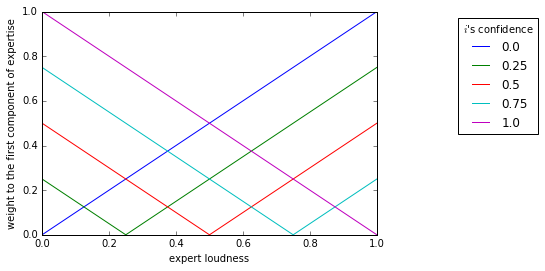

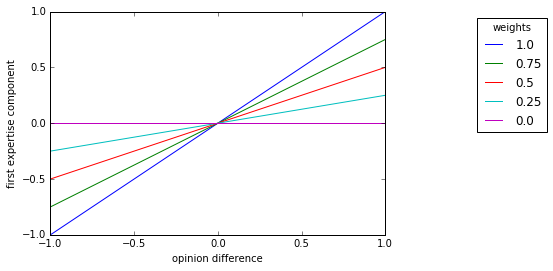

In [2]:
w_i = np.linspace(0,1,5) # my loudness
w_j = np.linspace(0,1,5) # expert loudness
belief_diff = np.linspace(-1,1,10) # difference in beliefs

for i,v in enumerate(w_i):
    w = np.abs(w_j - w_i[i])
    plt.plot(w_j, w)
    plt.xlabel('expert loudness')
    plt.ylabel('weight to the first component of expertise')
    
plt.legend(w_i, title="$i$'s confidence", bbox_to_anchor=(1, 1, .5, 0))
plt.show()

for i,v in enumerate(w):
    plt.plot(belief_diff, w[i] * belief_diff)
    
plt.xlabel('opinion difference')
plt.ylabel('first expertise component')
plt.legend(w, title="weights", bbox_to_anchor=(1, 1, .5, 0))

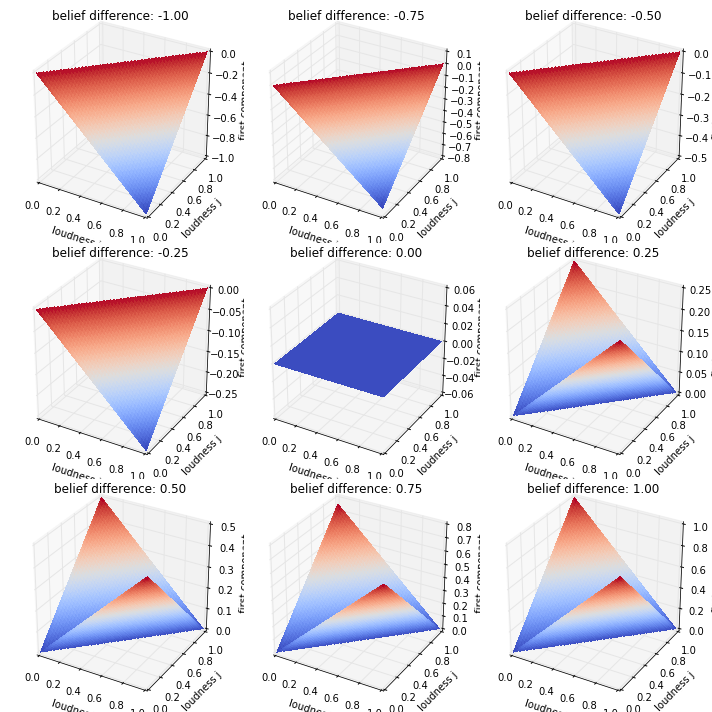

In [152]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(10,10))

w_i = np.linspace(0,1,50) # my loudness
w_j = np.linspace(0,1,50) # expert loudness
belief_diff = np.linspace(-1,1,9)

for i,bd in enumerate(belief_diff):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    x, y = np.meshgrid(w_i, w_j, indexing='ij')
    z = np.abs(x - y) * bd
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.title('belief difference: %.2f' % bd)
    ax.set_xlabel('loudness i')
    ax.set_ylabel('loudness j')
    ax.set_zlabel('first component')
    plt.tight_layout()
    

Model 2: 
\begin{equation}
\frac{w_i}{ w_j}
\end{equation}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


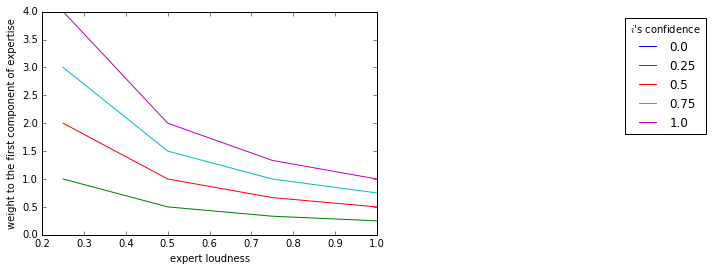

In [95]:
for i,v in enumerate(w_i):
    w = np.abs(w_i[i] / w_j)
    plt.plot(w_j, w)
    plt.xlabel('expert loudness')
    plt.ylabel('weight to the first component of expertise')
    
plt.legend(w_i, title="$i$'s confidence", bbox_to_anchor=(1, 1, 1, 0))

Model 3: Overlap between two beta distributions

(0, 1)

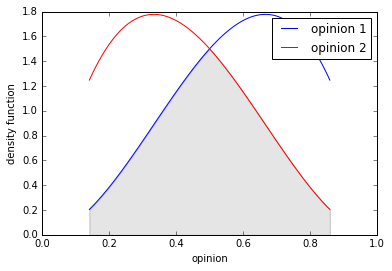

In [3]:
from scipy.stats import beta
# beta parameters
a1,b1 = 3,2
a2,b2 = 2,3
# compute beta distributions
x = np.linspace(beta.ppf(0.01, a1, b1), beta.ppf(0.99, a2, b2), 100)
beta1 = beta.pdf(x, a1, b1)
beta2 = beta.pdf(x, a2, b2)

# plot
plt.plot(x,beta1)
plt.plot(x,beta2, 'r')
plt.fill_between(x=x, y1=[min(beta1[i],beta2[i]) for i,v in enumerate(beta1)], alpha=.2, facecolor='gray')
plt.xlabel('opinion')
plt.ylabel('density function')
plt.legend(['opinion 1','opinion 2'])
plt.xlim([0,1])

In [19]:
# Calculate overlap between the two KDEs.
from scipy.integrate import quad
def y_pts(pt, a1,a2,b1,b2):
    y_pt = min(beta.pdf(pt, a1, b1), beta.pdf(pt, a2, b2))
    return y_pt

# support of the integral
xmin, xmax = 0, 1
x_pts = np.mgrid[xmin:xmax:1000]

# Store overlap value.
overlap, err = quad(y_pts, 0, 1, args=(a1,a2,b1,b2)) 

In [49]:
overlap

1.0

# Trust as likelihood

Here we test a very simple idea. If opinions are thought as probability distributions over possible outcomes, how does the opinion of one agent $i$ affects the perception that that agent will have of another agent $j$? The intuition behind our approach is that agent $i$ will sample from $j$ distribution and evaluate the likelihood of these data points based on its own opinion (i.e. its own model of the world). The problem thus reduces to a much better understood problem of data likelihood.    

In [92]:
def firstComp(beta1, beta2):
    a_s, b_s = beta1 # opinion self 
    a_e, b_e = beta2 # opinion expert
    r = beta.rvs(a_e, b_e, size=10000)
    return np.log(beta.pdf(r, a_s, b_s)).sum()

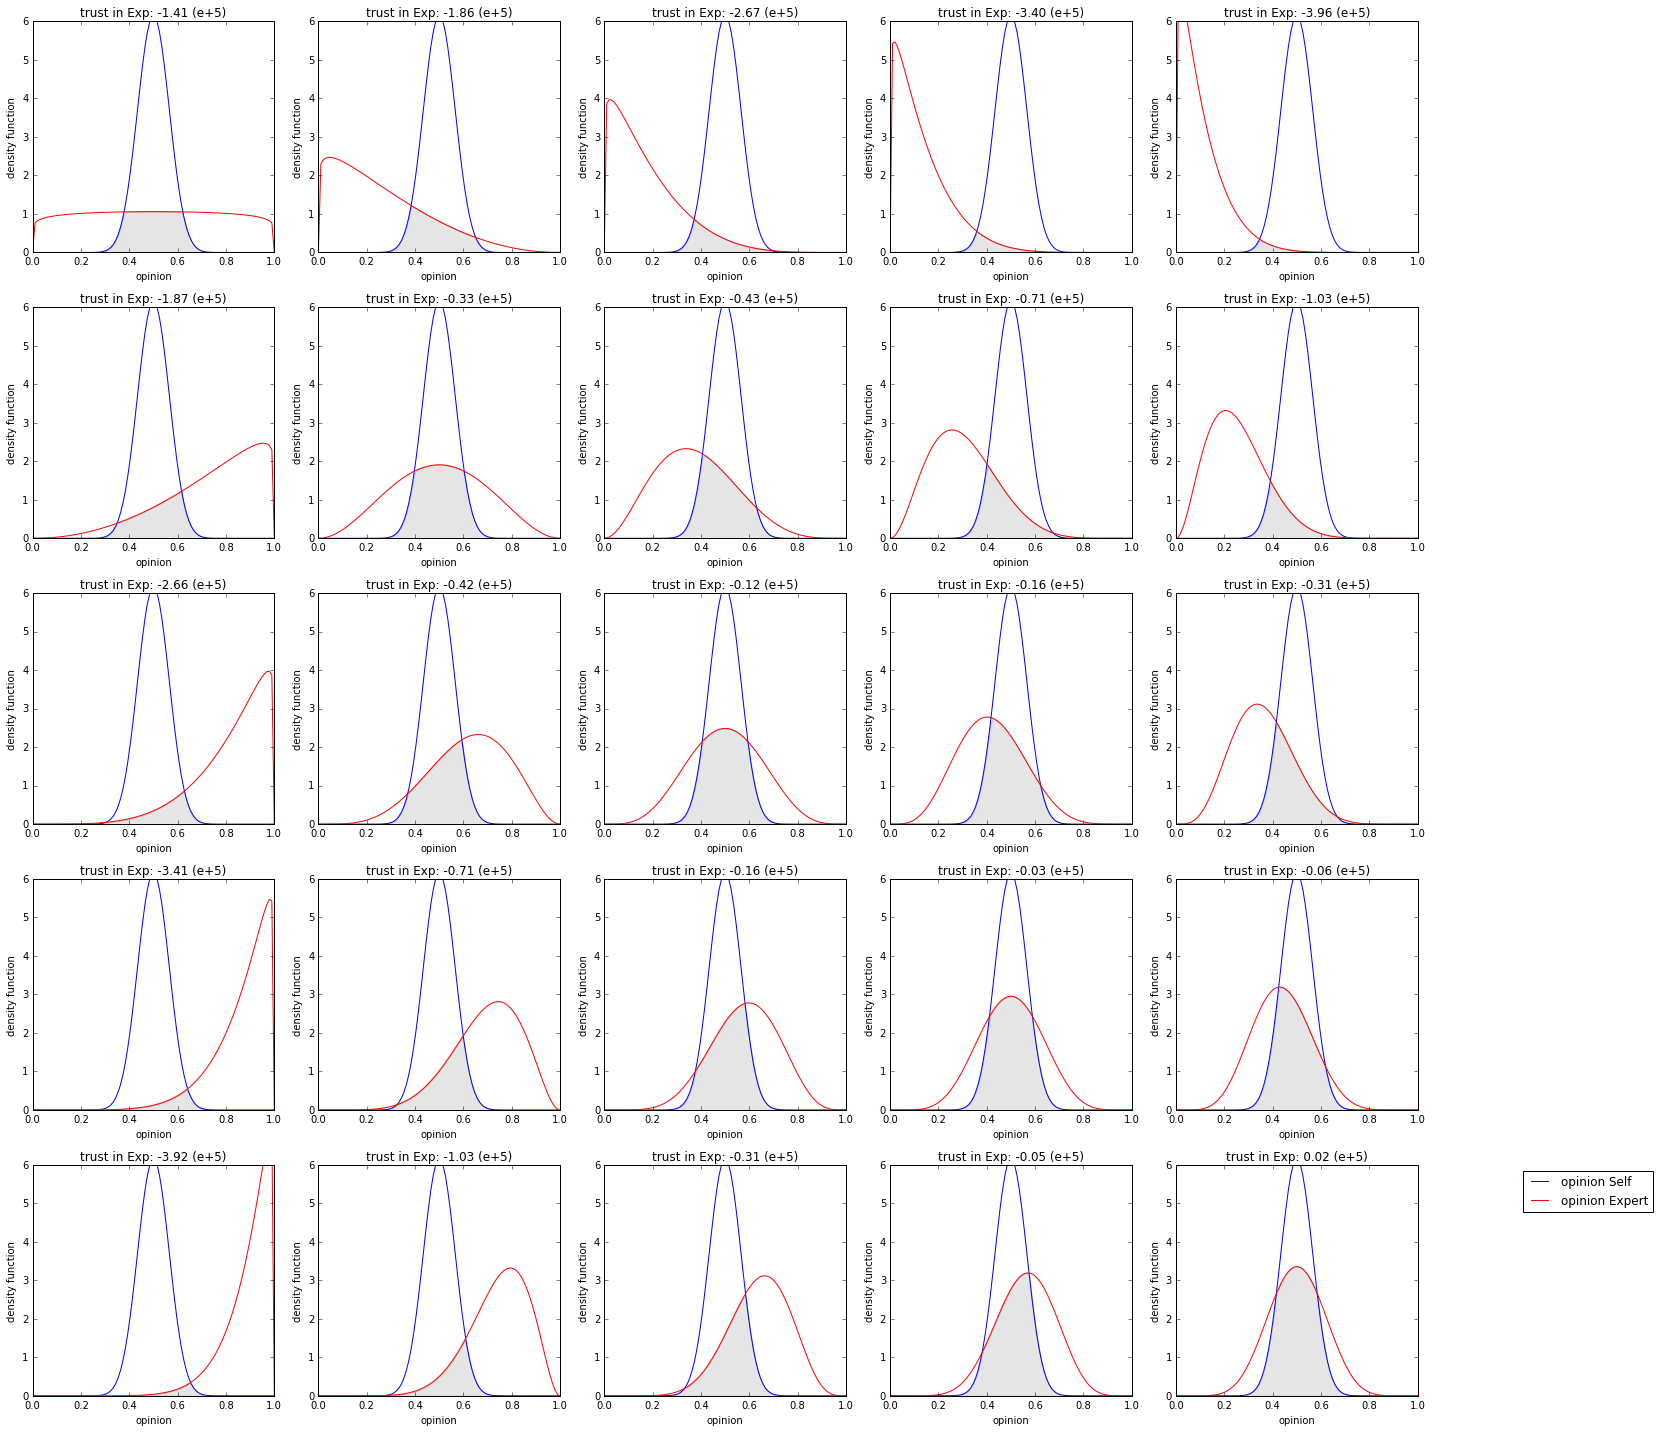

In [97]:
rang = np.linspace(1.1,9.1,5)

a_s, b_s = (30,30)
c = 0
x = np.linspace(0, 1, 100)
plt.figure(figsize=(20,20))
for a_e in rang:
    for b_e in rang:
        c+=1
        # compute beta distributions
        beta1 = beta.pdf(x, a_s, b_s)
        beta2 = beta.pdf(x, a_e, b_e)

        # plot
        plt.subplot(5,5,c)
        plt.plot(x,beta1)
        plt.plot(x,beta2, 'r')
        plt.fill_between(x=x, y1=[min(beta1[i],beta2[i]) for i,v in enumerate(beta1)], alpha=.2, facecolor='gray')
        plt.xlabel('opinion')
        plt.ylabel('density function')
        plt.xlim([0,1])
        plt.ylim([0,6])
        plt.title('trust in Exp: %.2f (e+5)' % (firstComp((a_s,b_s),(a_e,b_e))/100000))

plt.legend(['opinion Self','opinion Expert'], bbox_to_anchor=(2, 1))
plt.tight_layout()

In [98]:
a_s,b_s = (5,5)
a_e,b_e = (50,50)
print(firstComp((a_s,b_s),(a_e,b_e))/100000)
print(firstComp((a_e,b_e),(a_s,b_s))/100000)


0.08605653954804622
-0.3024130483086048
